In [1]:
# The script below works for Python 2 not Python 3, 
# simply because the instructor hates to type parentheses for print. 
# Public Domain
# Forrest Sheng Bao, Iowa State University 
# For his NLP class

# We will see Keras-style APIs to build the network 
# Thus, no low-level function calls. 

# Import all modules 
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the data
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.011

the label is 5


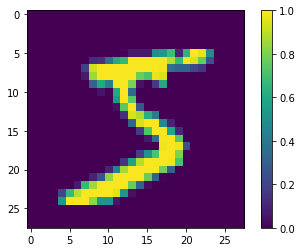

In [3]:
# How does the data look like? 
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
print "the label is {}".format(y_train[0] )

In [4]:
# Build the network
model = tf.keras.models.Sequential([  # Sequential means a sequence of layers
  tf.keras.layers.Flatten(),  # flatten an image to its dimensions 
  tf.keras.layers.Dense(54, activation=tf.nn.relu),   # an FC layer
  tf.keras.layers.Dropout(0.5),                        # certain dropouts 
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # output layer, FC 
])

In [5]:
# How to train it
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train it 
model.fit(x_train[:20000], y_train[:20000], epochs=2)

Epoch 1/2
20000/20000 [==============================] - 1s 52us/step - loss: 0.7928 - acc: 0.7563
Epoch 2/2
20000/20000 [==============================] - 1s 40us/step - loss: 0.4728 - acc: 0.8619


In [7]:
# and evaluate it 
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 28us/step


[0.26938635719418524, 0.9234]

the expected label is: 8
the actual label is: 8


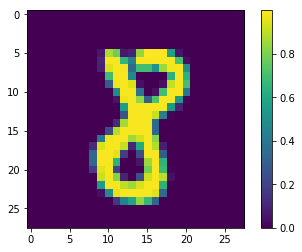

In [8]:
# Let's try it 
import random 
i = random.randint(0,len(y_test))
plt.figure()
plt.imshow(x_test[i])
plt.colorbar()

predictions = model.predict(x_test[i:i+1])
the_prediction = np.argmax(predictions[0])
print "the expected label is: {}".format(the_prediction)
print "the actual label is: {}".format(y_test[i])